In [1]:
import sys
sys.path.append('../src')

In [2]:
from imports.TactileBag import TactileBag

tbag = TactileBag('../data/bags/data2/')
tbag.params

{'path': '/home/hussain/me/projects/tactile/data/bags/data2',
 'possible_angles': [0.017453292519943295,
  0.03490658503988659,
  0.05235987755982989,
  0.06981317007977318,
  0.08726646259971647,
  0.10471975511965978,
  0.12217304763960307,
  0.13962634015954636,
  0.15707963267948966,
  0.17453292519943295],
 'N_examples': 20,
 'theta': 'full',
 'N_iters': 12,
 'z_thresh': -0.0037,
 'min_z': -0.015,
 'max_z': 0.035}

In [3]:
df = tbag.parsed_bag
df

,ts,contact_status,contact_case,contact_angle_x,contact_angle_y,contact_angle_z
0,1672235485049392995,False,0.0,0.001636,0.000830,0.002355
1,1672235485086052833,False,0.0,0.001678,0.000865,0.002270
2,1672235485103664372,False,0.0,0.001699,0.000899,0.002283
3,1672235485131136692,False,0.0,0.001646,0.000848,0.002319
4,1672235485148841329,False,0.0,0.001657,0.000877,0.002295
...,...,...,...,...,...,...
508727,1672246958274827871,False,0.0,0.176380,0.000774,0.002480
508728,1672246958290677711,False,0.0,0.176479,0.000865,0.002503
508729,1672246958303181902,False,0.0,0.176448,0.000805,0.002490
508730,1672246958333194754,False,0.0,0.176357,0.000800,0.002475


In [4]:
import pandas as pd

img_ts = pd.read_csv('/media/hussain/drive1/giant_tactile/timestamps.txt', names=['ts'])['ts'].values*1e9
img_ts

array([1.67223548e+18, 1.67223549e+18, 1.67223549e+18, ...,
       1.67224702e+18, 1.67224703e+18, 1.67224703e+18])

In [5]:
from pathlib import Path

imgs = sorted(Path('/media/hussain/drive1/giant_tactile/').glob('frame_*.png'))

In [6]:
from imports.ExtractContactCases import ExtractContactCases

ex = ExtractContactCases('../data/bags/data2', '../data/extractions/contact_extraction4/')
ex.parse_bag()

extracting contact timestamps:   0%|          | 0/508732 [00:00<?, ?it/s]

In [8]:
with open('cases', 'w') as f:
    f.write(str(ex.cases_ts))

In [9]:
len(ex.cases)

2292

In [38]:
ex.circle_rad, ex.center

(85, (180, 117))

In [40]:
117+85

202

In [10]:
import numpy as np
img_idx = []
for case_ts in ex.cases_ts:
    img_ts_idx = np.searchsorted(img_ts, case_ts[0])
    img_idx.append(img_ts_idx)

In [16]:
img_idx

[1,
 3,
 7,
 12,
 14,
 14,
 17,
 21,
 22,
 26,
 31,
 31,
 32,
 36,
 37,
 39,
 42,
 46,
 48,
 52,
 54,
 56,
 61,
 65,
 69,
 71,
 74,
 76,
 79,
 82,
 86,
 89,
 93,
 94,
 99,
 103,
 104,
 107,
 108,
 109,
 111,
 116,
 117,
 121,
 123,
 126,
 130,
 133,
 135,
 136,
 141,
 145,
 146,
 150,
 153,
 155,
 157,
 161,
 164,
 168,
 170,
 174,
 177,
 181,
 185,
 188,
 189,
 190,
 194,
 197,
 201,
 205,
 208,
 211,
 215,
 217,
 218,
 220,
 225,
 228,
 232,
 234,
 239,
 244,
 248,
 250,
 251,
 253,
 258,
 263,
 267,
 272,
 276,
 278,
 278,
 282,
 284,
 288,
 289,
 291,
 294,
 296,
 300,
 305,
 306,
 307,
 308,
 310,
 312,
 314,
 317,
 318,
 323,
 325,
 328,
 330,
 333,
 336,
 341,
 343,
 344,
 347,
 351,
 356,
 360,
 361,
 364,
 369,
 372,
 376,
 379,
 383,
 387,
 389,
 391,
 393,
 394,
 395,
 397,
 400,
 405,
 407,
 410,
 412,
 415,
 419,
 419,
 420,
 421,
 424,
 425,
 428,
 431,
 435,
 439,
 441,
 443,
 446,
 447,
 450,
 454,
 458,
 461,
 463,
 465,
 469,
 471,
 475,
 477,
 482,
 483,
 485,
 487,


31


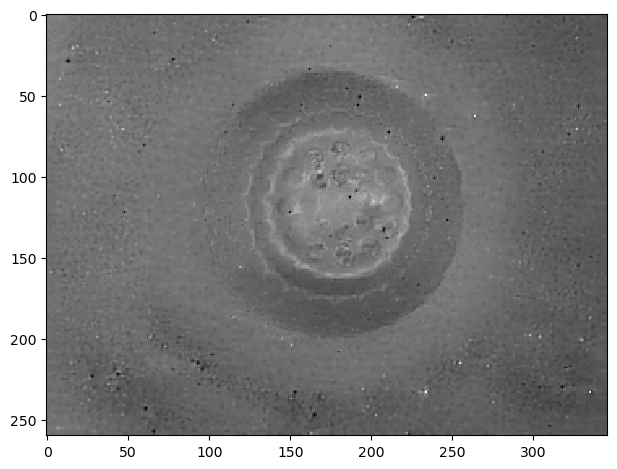

In [58]:
print(img_idx[10])
imshow(imread(imgs[32]))

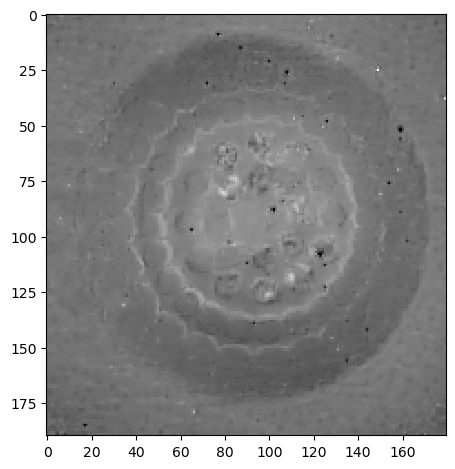

In [52]:
from skimage.io import imread, imshow

img = imread(imgs[img_idx[10]])
imshow(img[25:215, 85:265])

In [28]:
import pandas as pd
from pathlib import Path

all = pd.DataFrame({
    'img': [Path(imgs[i]).parts[-1] for i in img_idx],
    'rx': [ex.cases_dict[c][0] for c in ex.cases],
    'ry': [ex.cases_dict[c][1] for c in ex.cases]
})

In [63]:
img, rx, ry = all.iloc[3]
rx

0.0

In [31]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(all.index, train_size=0.75)

In [25]:
Path(imgs[0]).parts[-1]

'frame_0000031485.png'